# Microwave Reviews Analysis

### Analyze the three product data sets provided to identify, describe, and support with mathematical evidence, meaningful quantitative and/or qualitative patterns, relationships, measures, and parameters within and between star ratings, reviews, and helpfulness ratings that will help Sunshine Company succeed in their three new online marketplace product offerings.

In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
## Load Data
data = pd.read_csv('microwave.tsv', delimiter='\t')

In [3]:
## Initial Data Exploration
# Display the first few rows of the dataframe
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015


In [4]:
# Basic statistics of numerical fields
data.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.615000e+03,1.615000e+03,1615.000000,1615.000000,1615.000000
mean,2.956669e+07,5.327655e+08,3.444582,5.621672,6.669350
std,1.551920e+07,2.312119e+08,1.645238,27.771593,29.262638
min,2.838300e+04,1.092264e+08,1.000000,0.000000,0.000000
25%,1.544962e+07,4.234219e+08,2.000000,0.000000,0.000000
50%,2.987940e+07,4.863812e+08,4.000000,1.000000,2.000000
75%,4.408202e+07,7.310253e+08,5.000000,3.000000,5.000000
max,5.309410e+07,9.943392e+08,5.000000,814.000000,848.000000


In [5]:
# Check for missing values
data.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [6]:
## Data Cleaning
# Calculate helpfulness ratio and handle division by zero
data['helpfulness_ratio'] = data['helpful_votes'] / data['total_votes']
data['helpfulness_ratio'] = data['helpfulness_ratio'].fillna(-0.1)

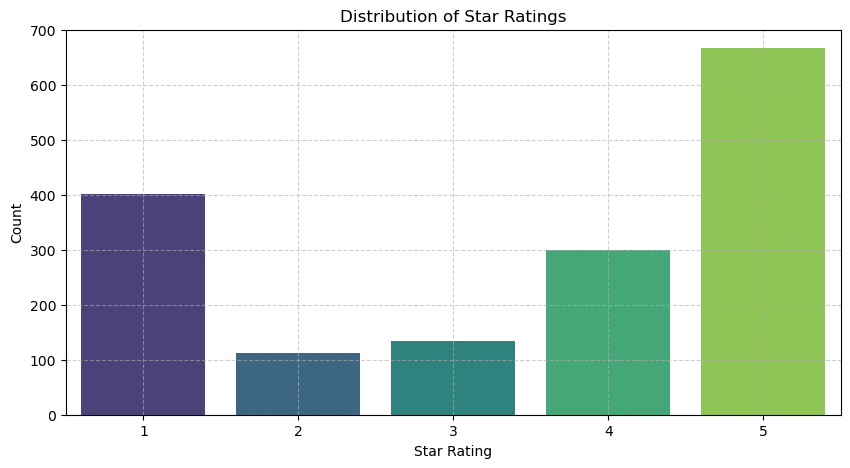

In [7]:
## Data Analysis
# Distribution of Star Ratings
plt.figure(figsize=(10, 5))
sns.countplot(x='star_rating', data=data, palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

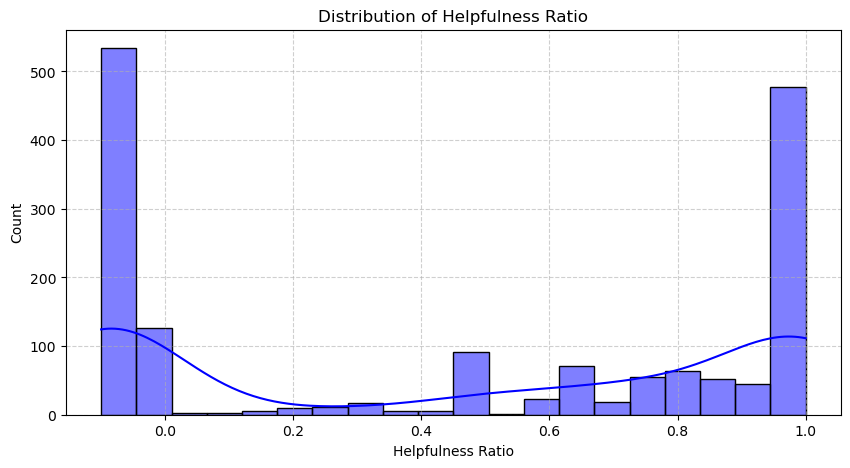

In [8]:
# Distribution of Helpfulness Ratio
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='helpfulness_ratio', bins=20, color='blue', kde=True)
plt.title('Distribution of Helpfulness Ratio')
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

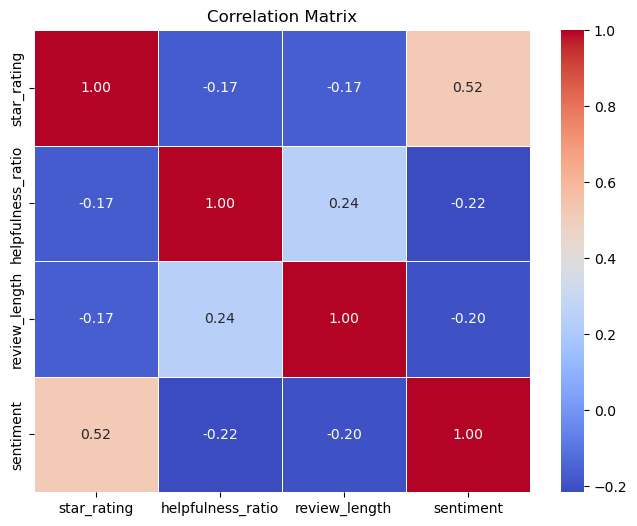

In [9]:
# Calculate review length
data['review_length'] = data['review_body'].apply(len)

# Sentiment analysis: Calculate polarity of reviews
data['sentiment'] = data['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Correlation Matrix
correlation_matrix = data[['star_rating', 'helpfulness_ratio', 'review_length', 'sentiment']].corr()

# Plotting Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Conclusion and Recommendations
The analysis reveals several key insights:
- **Star Ratings** have a bimodal distribution, with high volumes of very positive and very negative reviews.
- **Helpfulness Ratio** shows that many reviews are not voted on, but reviews with high ratios tend to be more impactful.
- **Sentiment Analysis** shows a moderate positive correlation with star ratings, suggesting that more positive reviews correlate with higher ratings.
- **Review Length** has a weak correlation with helpfulness, indicating that length alone does not determine review utility.

### Recommendations for Sunshine Company
- Encourage customers to leave detailed and positive reviews, as these influence potential buyers and enhance product visibility.
- Address negative feedback constructively to improve product ratings and customer satisfaction.
- Focus on quality and accurate product descriptions to ensure customer expectations are met, thereby influencing review positivity.

In [10]:
data['helpfulness_ratio'].value_counts()

-0.100000    534
 1.000000    449
 0.000000    126
 0.500000     92
 0.666667     66
            ... 
 0.946667      1
 0.222222      1
 0.870968      1
 0.090909      1
 0.903704      1
Name: helpfulness_ratio, Length: 130, dtype: int64

In [12]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpfulness_ratio,review_length,sentiment
0,US,21879631,RY52KZABZK8QF,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,1,0,0,N,Y,Do not recommend it. go use your money for som...,3 of the buttons stopped working after a month...,8/31/2015,-0.1,192,0.100000
1,US,14964566,R3GCOEV4HYZG2I,B0055UBB4O,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,5,0,0,N,Y,Looks as good as the picture,Didn't use it long so I can't attest to that b...,8/31/2015,-0.1,334,0.078667
2,US,13230389,R1V2OPPNL0QGCE,B0052G14E8,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,4,0,0,N,Y,Four Stars,"Very nice microwave, great price",8/31/2015,-0.1,32,0.790000
3,US,43655888,R9Q0QDTLKV567,B004ZU09QQ,423421857,danby 0.7 cu.ft. countertop microwave,Major Appliances,3,0,1,N,Y,quiet,"Quiet, but does not seem like 1000 watt power.",8/31/2015,0.0,46,0.000000
4,US,117794,R3DL7HYC3QTWNI,B005GSZB7I,827502283,"whirlpool stainless look countertop microwave,...",Major Appliances,4,0,0,N,Y,Four Stars,It's bigger than I thought.,8/31/2015,-0.1,27,0.000000
